## Practical Machine Learning : Rate of sale 

   
**Version : 1**

**Last Updated : 28-Feb-2021**

### Table of contents :

- Problem Statement
- High Level Approach
    - Modeling Approach  
    - Data Preprocessing Approach
    - EDA Analysis
    - Modeling Steps
    - Feature engineering
    - Modeling Steps
    - Performance Evaluation
- Next steps and future enhancement

### Problem Statement :

We’re looking to see how you would approach a problem focused on predicting the rate of sale for a given product at the size level. A sample dataset has been provided 
for you to explore and potentially produce a working prototype.


### Data:


Dataseet.csv with 1750 unique products and 10,527 distinct ProductSkuCode and 13 columns.

### Objective:

Share an approch on how we can build a model top predict rate of sale. RateofSales actually Indicates how well merchandise moves through your store.  Knowing a product’s rate of sale enables you to revise your purchase decisions accordingly

--------------------------------------

### High Level Approach :


By observing the data we can determine that RateofSales is a derive filed. And it is calculated by FullPriceUnits / ProductMaxDaysToSellinFullPrice. 

so we need to build a model that will predict FullPriceUnits & ProductMaxDaysToSellinFullPrice. Once we have the prediction at ProductSkuCode level then we can easily derive RateofSales.

First of all we seperate the dataset for both the dependent features (FullPriceUnits & ProductMaxDaysToSellinFullPrice). Build  seperate model to predict the value of both. 

Share an approch for predicting ProductMaxDaysToSellinFullPrice values. The same approch can be used to determine FullPriceUnits as well.  



#### Modeling Approach :

   

- **Level 1:** 
    - We will adopt  tree  based techiniques at present since we have majority of caterorical features.
    

 

- **Level 2:** 
    
    - We will also try Survival regression to compare if we can get a better performance.
    
    
    

#### Data Preprocessing  Approach



- Check for missing values and outliers in the data
- Also we have ceratin categorical features like ProductCategory,ProductSizeGroupDescription with multiple level. This may require ceratin transformation.
- Check for data distribution



#### EDA Analysis 

- Analyse the data at product level to determinee top selling product in terms of unit.
- Determine which prodcut had derive most revenue
- Analyse the day range within whihc most of the products sold at full price
- Analyse which prodcut group had most SKU sold
- Analyse the day range within which most of the productssku sold at full price
- Determine if the season has an effect on the sales or not
- Does high price has an effect on units sold
- Determine which SKU has sold most
- Determine which SKU had geneerated the most revenue so far




#### Feature engineering

- Convert the categorical features into dummy varibles



#### Modeling Steps
   
- Split/Partition the base dataset to build and test your model
- Important varibles
- Remove multicollinearity and test the model
- Predict on test dataset 



#### Performance Evaluation:

- Validate the performance of models on MAPE & MSE value



### Next steps and future enhancement:

- Long term option for model approch and enhancement
- Additional data may help improve performance
- Reproducible approch


    
    

---------------------------------------------------

## <a id='1'>1. Import all the necessary libraries to run our Analysis </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from numpy import exp
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew 
from math import sqrt
import math
import sklearn.metrics as metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold ,GridSearchCV
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

import warnings
warnings.filterwarnings('ignore')

/Users/himswamy0/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/himswamy0/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following comma

## <a id='2'>2. Import the dataset to run our Analysis </a>

In [300]:
data = pd.read_csv("dataset.csv")

#create a copy of the dataset

data1 = data.copy()

In [301]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ProductNumber                    10528 non-null  int64  
 1   ProductSkuCode                   10528 non-null  int64  
 2   ProductSize                      10528 non-null  object 
 3   ProductDivision                  10528 non-null  int64  
 4   ProductDepartment                10528 non-null  int64  
 5   ProductGroup                     10528 non-null  int64  
 6   ProductCategory                  10528 non-null  int64  
 7   ProductSizeGroupDescription      10528 non-null  int64  
 8   ProductOriginalUnitPriceGBP      10528 non-null  float64
 9   ProductMaxDaysToSellInFullPrice  10528 non-null  int64  
 10  Season                           10528 non-null  int64  
 11  FullPriceUnits                   10528 non-null  int64  
 12  RateofSales       

----------------------

## <a id='2'>2. Data Preprocessing  </a>

###### Check nulls or missing value

In [302]:
null_counts = data1.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
ProductNumber                      0
ProductSkuCode                     0
ProductSize                        0
ProductDivision                    0
ProductDepartment                  0
ProductGroup                       0
ProductCategory                    0
ProductSizeGroupDescription        0
ProductOriginalUnitPriceGBP        0
ProductMaxDaysToSellInFullPrice    0
Season                             0
FullPriceUnits                     0
RateofSales                        0
dtype: int64


#### Create new column as an indicator of sale

In [304]:
data1['Sold'] = data1['FullPriceUnits'].apply(lambda x: 1 if x >0 else 0)

In [ ]:
data1[data1['ProductMaxDaysToSellInFullPrice'] < 0] = 1

--------------------------------------------

## <a id='3'>3. Exploratory Data Analysis</a>

#### Analyse at product level

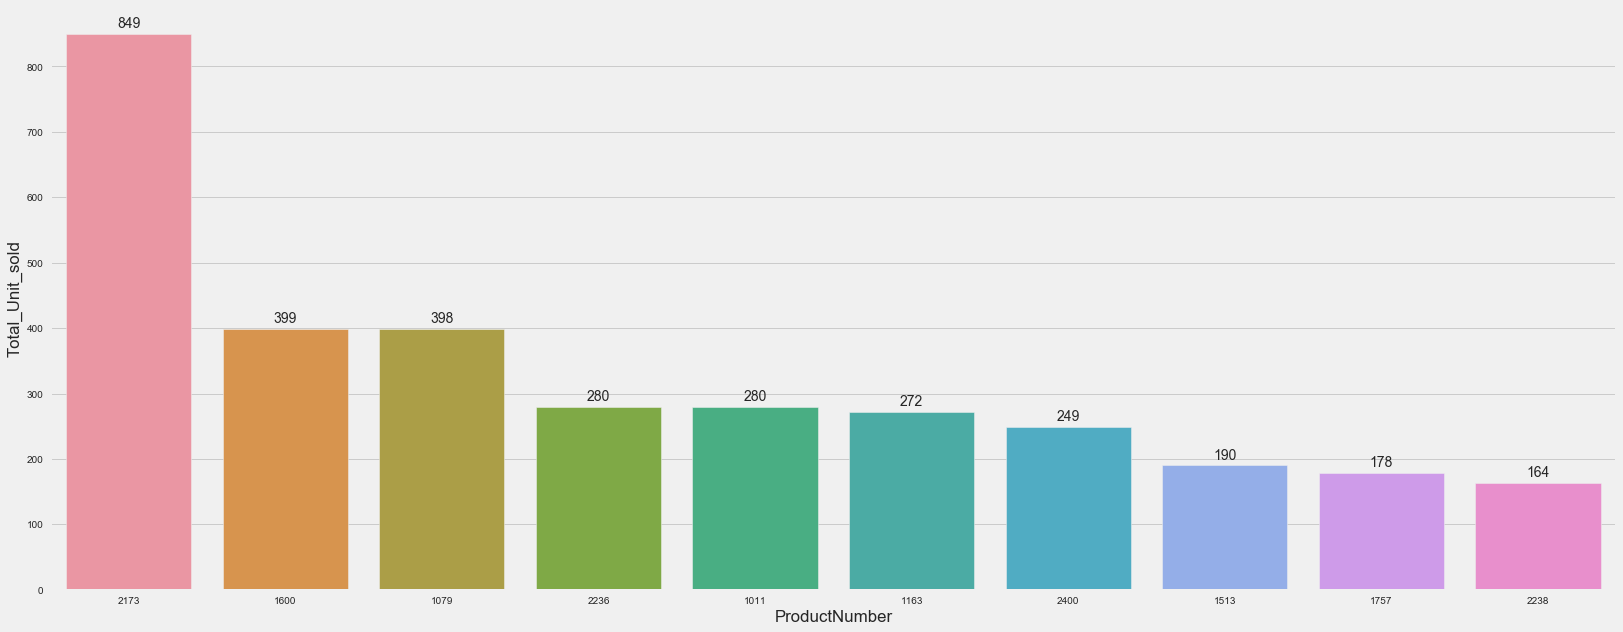

In [305]:
FM_BASE = data1[['ProductNumber','FullPriceUnits']]

FM_table = FM_BASE.groupby('ProductNumber').agg({'ProductNumber': lambda x: len(x),
                                                'FullPriceUnits': lambda x: x.sum()})

FM_table.rename(columns={ 'ProductNumber': 'Variant_Of_Product',
                         'FullPriceUnits': 'Total_Unit_sold'}, inplace=True)
FM_table_1 = FM_table.reset_index()

FM_table_2 = FM_table_1.sort_values(by='Total_Unit_sold', ascending=False)

FM_table_3 = FM_table_2.head(10)

plt.figure(figsize=(25,10))
ax = sns.barplot(x="ProductNumber", y="Total_Unit_sold", data=FM_table_3,
                 order=FM_table_3.sort_values('Total_Unit_sold',ascending=False).ProductNumber)


# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2),
 y = height+10,
 s = '{:.0f}'.format(height), 
 ha = 'center') 

- Highlighting the top selling products in terms of unit sold

#### Which product had generated most revenue ?

In [86]:
FM_table_3 = pd.merge(FM_table_2, data1[['ProductNumber','ProductOriginalUnitPriceGBP']], 
                      on='ProductNumber', how='inner')

FM_table_3 = FM_table_3.drop_duplicates()
FM_table_3['Sales_Revenues'] = FM_table_3['Total_Unit_sold'] * FM_table_3['ProductOriginalUnitPriceGBP']
FM_table_4 = FM_table_3.sort_values(by='Sales_Revenues', ascending=False)

FM_table_5 = FM_table_4.head(10)

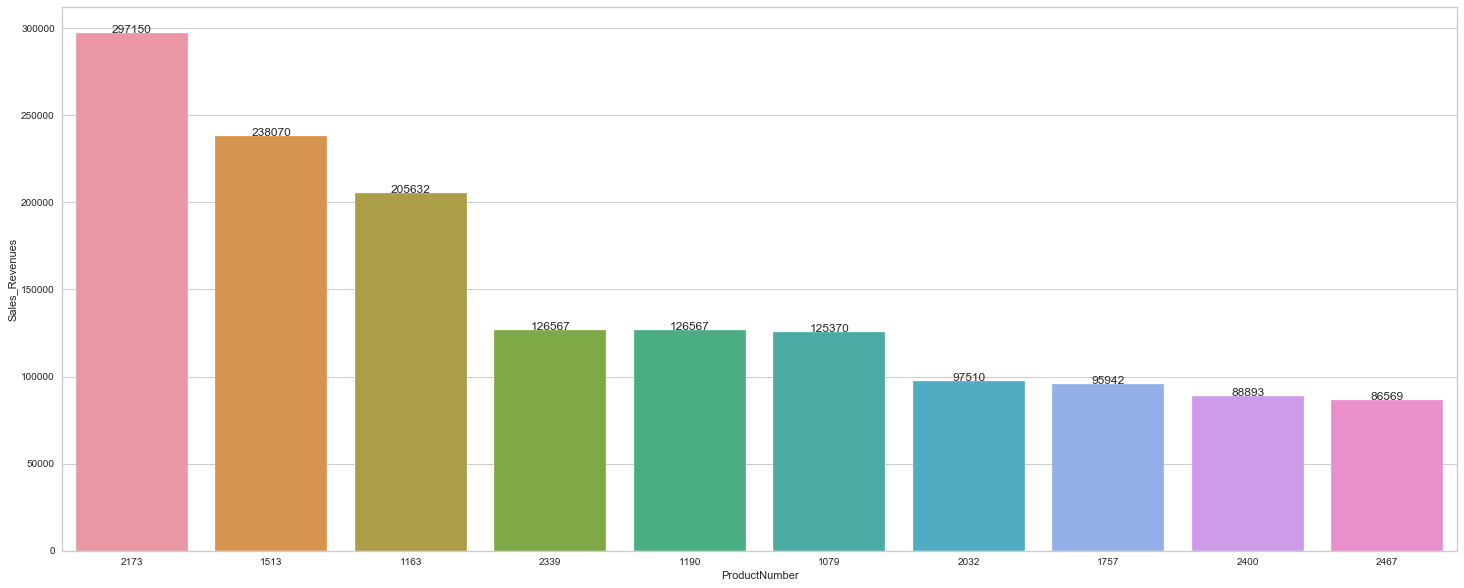

In [93]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x="ProductNumber", y="Sales_Revenues", data=FM_table_5,
                 order=FM_table_5.sort_values('Sales_Revenues',ascending=False).ProductNumber)


# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2),
 y = height+10,
 s = '{:.0f}'.format(height), 
 ha = 'center') 

#### Distribution of numbers of days for a full Price sales of the product

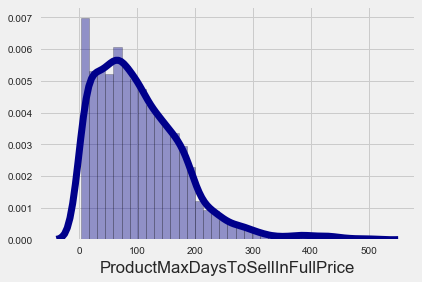

In [307]:
data2 = data1[['ProductNumber','ProductMaxDaysToSellInFullPrice']]

data2 = data2.drop_duplicates()

data2.groupby(['ProductNumber'], as_index=False)['ProductMaxDaysToSellInFullPrice'].max()
data3= data2[data2['ProductMaxDaysToSellInFullPrice'] >2]

sns.distplot(data3['ProductMaxDaysToSellInFullPrice'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 7})

- If we observe most the products sold for around 60-140 days at full price


#### Analyse at Product Group level

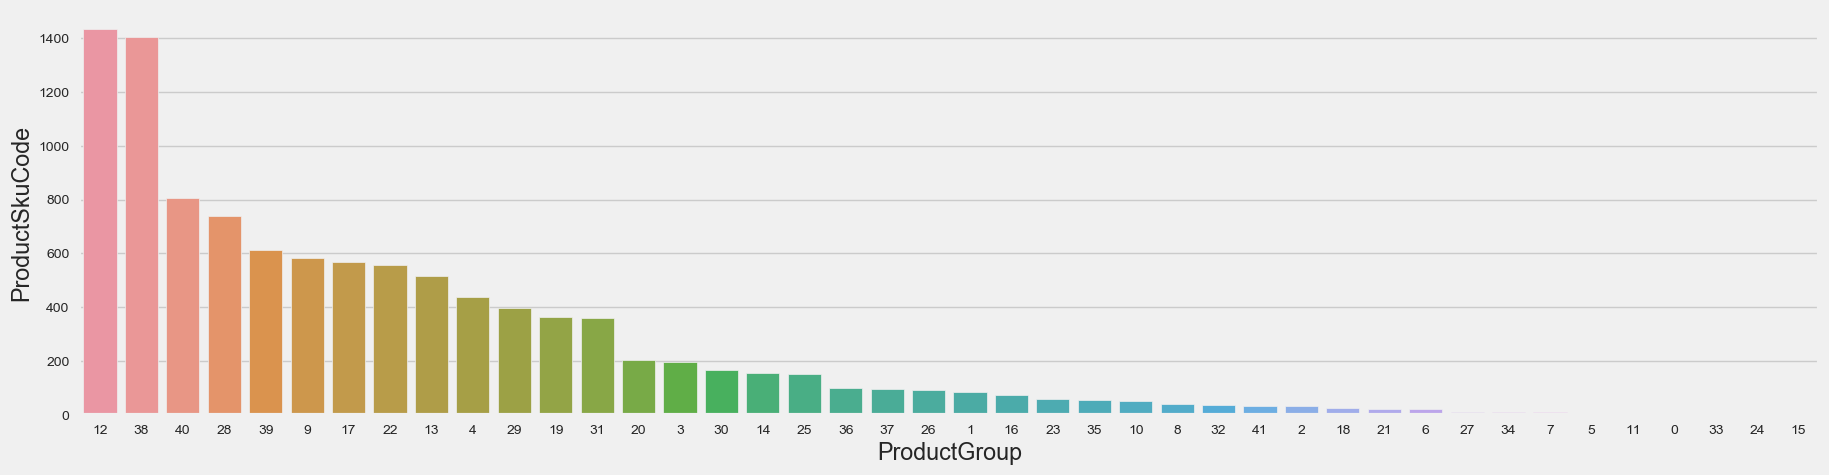

In [308]:
pr_grp = data1.groupby(["ProductGroup"])["ProductSkuCode"].count().reset_index().sort_values("ProductSkuCode",
                                                                ascending=False).reset_index(drop=True)
fig, axes = plt.subplots(figsize=(20,5), dpi= 100)

ax = sns.barplot(x="ProductGroup", y="ProductSkuCode", data=pr_grp,
                 order=pr_grp.sort_values('ProductSkuCode',ascending=False).ProductGroup)

#### Distribution of numbers of days for a full Price sales at Productsku level

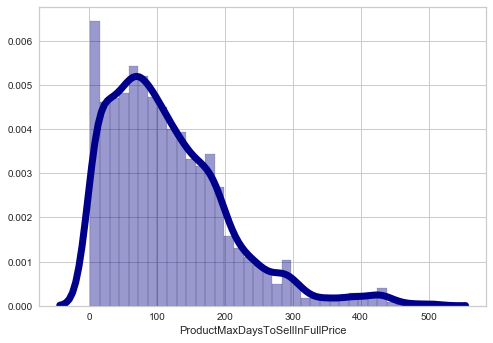

In [123]:
data2 = data1[['ProductSkuCode','ProductMaxDaysToSellInFullPrice']]

data2 = data2.drop_duplicates()

data2.groupby(['ProductSkuCode'], as_index=False)['ProductMaxDaysToSellInFullPrice'].max()
data3= data2[data2['ProductMaxDaysToSellInFullPrice'] >1]

sns.distplot(data3['ProductMaxDaysToSellInFullPrice'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 7})

#### Analyse at season level

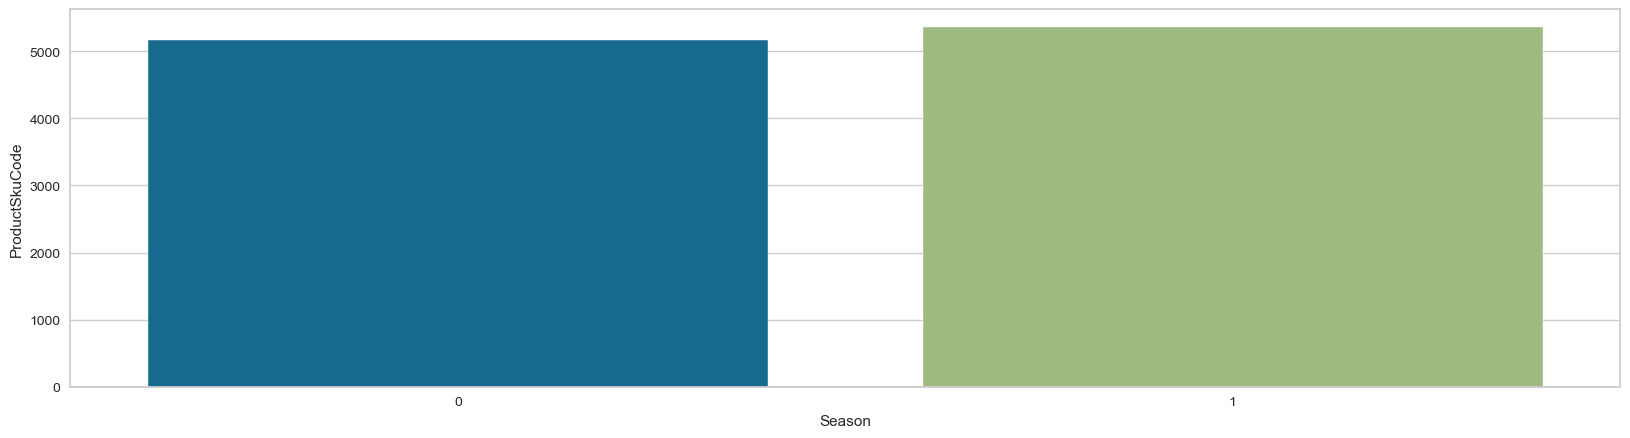

In [126]:
season_grp = data1.groupby(["Season"])["ProductSkuCode"].count().reset_index().sort_values("ProductSkuCode",
                                                                ascending=False).reset_index(drop=True)

fig, axes = plt.subplots(figsize=(20,5), dpi= 100)

ax = sns.barplot(x="Season", y="ProductSkuCode", data=season_grp)

- Season had no major effect on the sales of Productsku

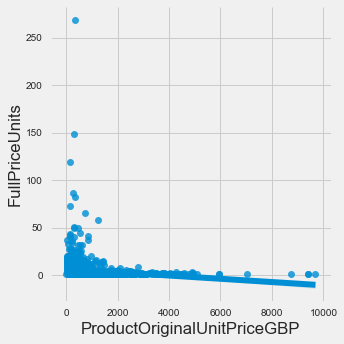

In [309]:
# Plot the sales frequency vs price:

price_units = data1[['ProductNumber','ProductOriginalUnitPriceGBP','FullPriceUnits']]

price_units = price_units.drop_duplicates()

price_unit2= price_units[price_units['FullPriceUnits'] >0]

price_unit3 = price_unit2.groupby(['ProductNumber','ProductOriginalUnitPriceGBP'], 
                                  as_index=False)['FullPriceUnits'].max()


sns.lmplot(
    x='ProductOriginalUnitPriceGBP', 
    y='FullPriceUnits', 
    data=price_unit3[['ProductOriginalUnitPriceGBP', 'FullPriceUnits']]
)


- It can be observed highly price prodcut have low volumnee of sales per unit

#### What are the major top selling ProductSkuCode in terms of unit and revenue

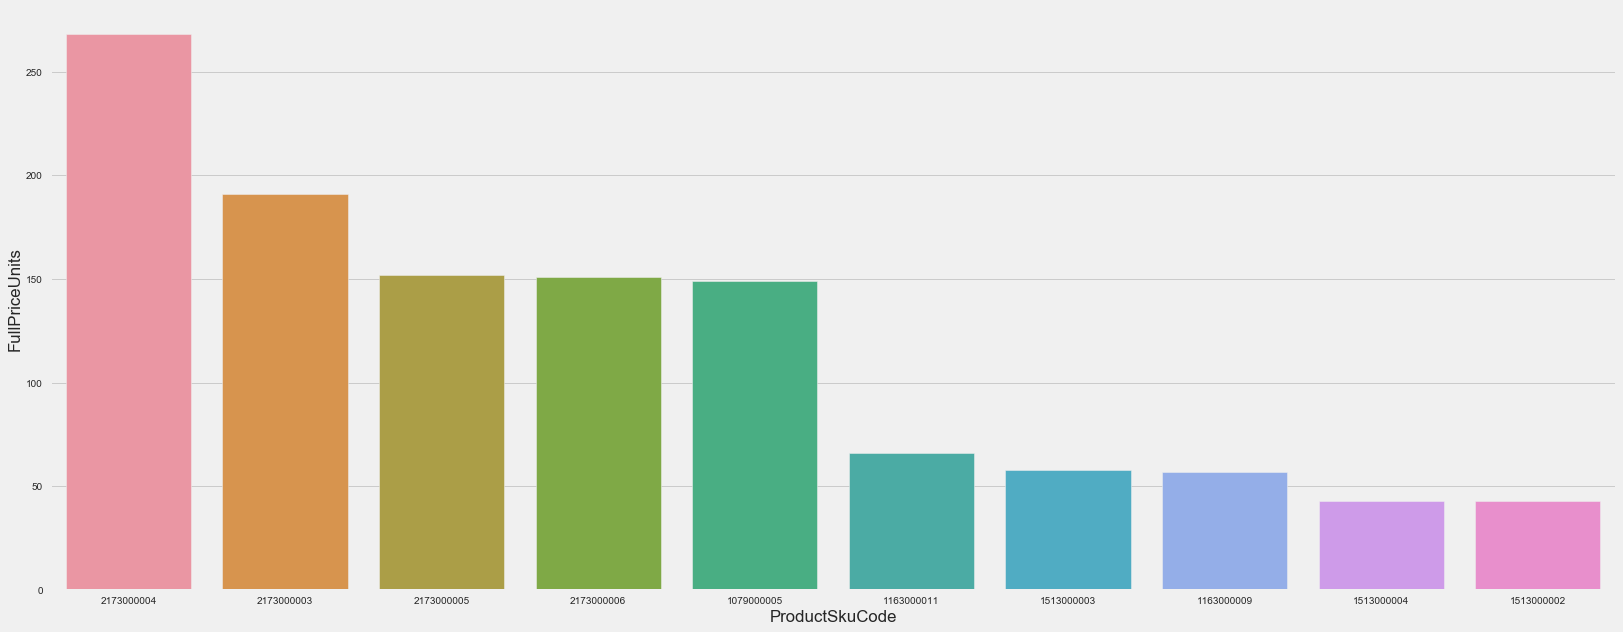

In [310]:
top_sold_brands = data1[['ProductSkuCode','FullPriceUnits','ProductOriginalUnitPriceGBP']]

top_sold_brands = top_sold_brands.drop_duplicates()

top_sold_brand2= top_sold_brands[top_sold_brands['FullPriceUnits'] >0]

top_sold_brand2['Sales_Revenues'] = top_sold_brand2['FullPriceUnits'] * top_sold_brand2['ProductOriginalUnitPriceGBP']

top_sold_brand3 = top_sold_brand2.sort_values(by='Sales_Revenues', ascending=False)

top_sold_brand3 = top_sold_brand3.head(10)

plt.figure(figsize=(25,10))
ax = sns.barplot(x="ProductSkuCode", y="FullPriceUnits", data=top_sold_brand3,
                 order=top_sold_brand3.sort_values('FullPriceUnits',ascending=False).ProductSkuCode)

#### Which SKU generate most Revenue ?

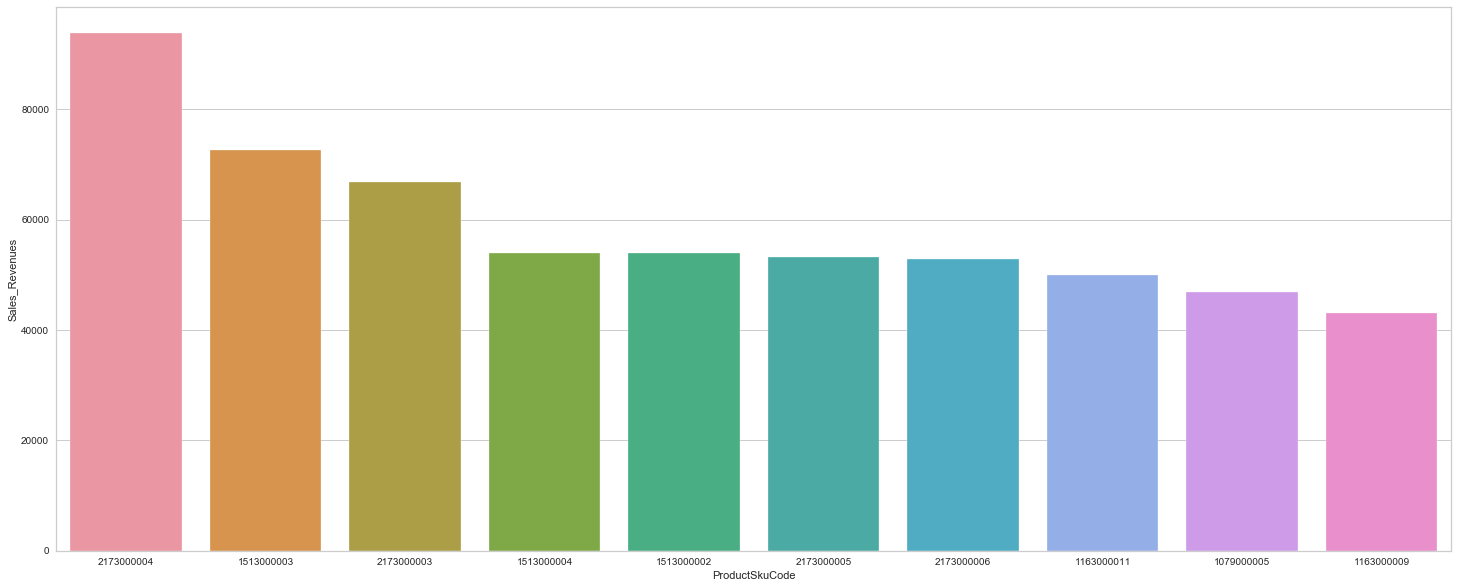

In [148]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x="ProductSkuCode", y="Sales_Revenues", data=top_sold_brand3,
                 order=top_sold_brand3.sort_values('Sales_Revenues',ascending=False).ProductSkuCode)

**Observation**

- Some of SKU have generateed more than 50K GBP

## <a id='4'>4. Feature Engineering </a>

In [314]:
data1['Sold'] = data1['FullPriceUnits'].apply(lambda x: 1 if x >0 else 0)

data2 = data1.copy()

#categorical data
categorical_cols = ['ProductDivision','ProductDepartment','ProductGroup','ProductCategory','Season'] 


df_base = pd.get_dummies(data2, columns = categorical_cols)

df_base[df_base['ProductMaxDaysToSellInFullPrice'] < 0] = 1



## <a id='5'>5. Implementataion of Machine Learning Models </a>

In [329]:

labels = np.array(df_base['ProductMaxDaysToSellInFullPrice'])

features = df_base.drop(['ProductNumber','ProductSkuCode','ProductSize','ProductSizeGroupDescription',
                        'ProductMaxDaysToSellInFullPrice','FullPriceUnits','RateofSales','Sold'], axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [330]:

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [327]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7896, 298)
Training Labels Shape: (7896,)
Testing Features Shape: (2632, 298)
Testing Labels Shape: (2632,)


### 1st Approach Random forest model

In [318]:

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
print('Mean Absolute Percentage Error:',round(np.mean(mape), 2), 'degrees.')



Mean Absolute Error: 46.36 degrees.
Mean Absolute Percentage Error: 1329.53 degrees.


**Observation**

- Mape and MAE seems to be very high model need lots of Improvement

#### Lets try to just use certain Improtant features in our model

In [320]:

importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ProductOriginalUnitPriceGBP Importance: 0.49
Variable: ProductDepartment_6  Importance: 0.02
Variable: Season_0             Importance: 0.02
Variable: Season_1             Importance: 0.02
Variable: ProductDivision_0    Importance: 0.01
Variable: ProductDivision_1    Importance: 0.01
Variable: ProductDepartment_4  Importance: 0.01
Variable: ProductDepartment_7  Importance: 0.01
Variable: ProductGroup_4       Importance: 0.01
Variable: ProductGroup_12      Importance: 0.01
Variable: ProductGroup_17      Importance: 0.01
Variable: ProductGroup_38      Importance: 0.01
Variable: ProductCategory_34   Importance: 0.01
Variable: ProductCategory_67   Importance: 0.01
Variable: ProductCategory_98   Importance: 0.01
Variable: ProductCategory_107  Importance: 0.01
Variable: ProductCategory_113  Importance: 0.01
Variable: ProductCategory_121  Importance: 0.01
Variable: ProductCategory_125  Importance: 0.01
Variable: ProductCategory_136  Importance: 0.01
Variable: ProductCategory_137  Im

- Lets try to use some only the important feature to check incase we have some improvement in the model

In [333]:
# New random forest with only the two most important variables

rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features


train_important = train_features[['ProductOriginalUnitPriceGBP','ProductDepartment_6','Season_0','Season_1','ProductDivision_0','ProductDivision_1','ProductDepartment_4','ProductDepartment_7','ProductGroup_4','ProductGroup_12',
'ProductGroup_17','ProductGroup_38','ProductCategory_34','ProductCategory_67','ProductCategory_98','ProductCategory_107','ProductCategory_113','ProductCategory_121','ProductCategory_125','ProductCategory_136','ProductCategory_137','ProductCategory_157','ProductCategory_158','ProductCategory_183','ProductCategory_184','ProductCategory_185','ProductCategory_217']]

test_important = test_features[['ProductOriginalUnitPriceGBP','ProductDepartment_6','Season_0','Season_1','ProductDivision_0','ProductDivision_1','ProductDepartment_4','ProductDepartment_7','ProductGroup_4','ProductGroup_12',
'ProductGroup_17','ProductGroup_38','ProductCategory_34','ProductCategory_67','ProductCategory_98','ProductCategory_107','ProductCategory_113','ProductCategory_121','ProductCategory_125','ProductCategory_136','ProductCategory_137','ProductCategory_157','ProductCategory_158','ProductCategory_183','ProductCategory_184','ProductCategory_185','ProductCategory_217']]

# Train the random forest
rf_most_important.fit(train_important, train_labels)


# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))


print('Mean Absolute Error:', round(np.mean(mape), 2), 'degrees.')


Mean Absolute Error: 48.39 degrees.
Mean Absolute Error: 1413.23 degrees.


In [337]:
feature_list = list(train_important.columns)

In [338]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_important, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

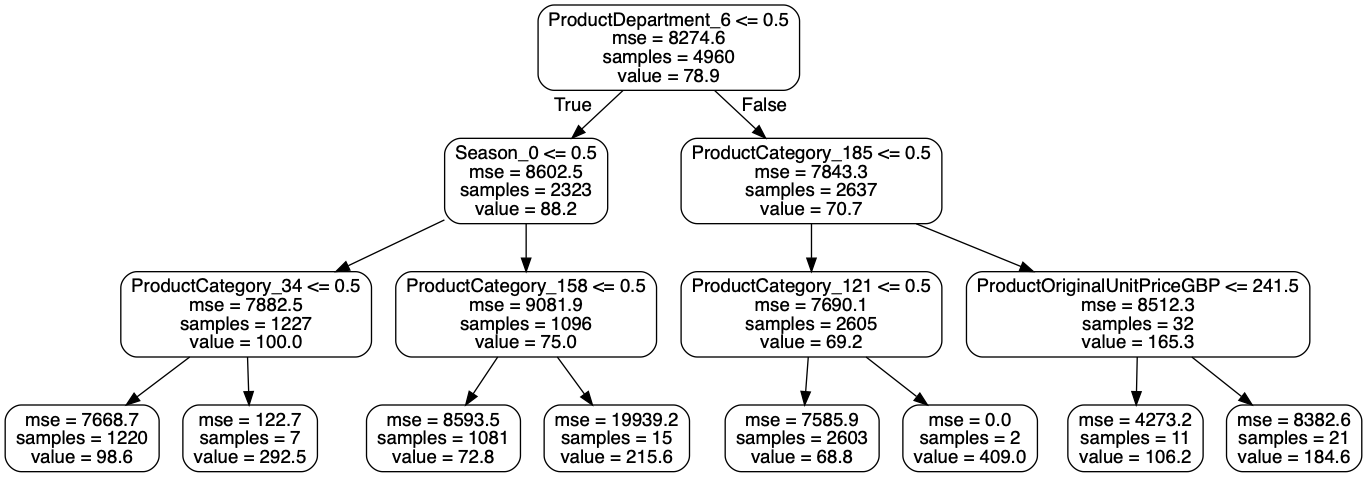

In [339]:

Image(graph.create_png())

-------------------------------

### 2nd  Approach Survival Analysis

##### Survival Regression Approch

In [252]:
Survival_data = df_base.drop(['ProductNumber','ProductSkuCode','ProductSize','ProductSizeGroupDescription','FullPriceUnits'
                              ,'RateofSales','Unnamed: 13','ProductDivision_0','ProductDepartment_0','ProductCategory_0',
                             'Season_0'], axis = 1)


#### Lets try to remove multicollinearity and run the survival model

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_features=list(Survival_data.columns)
data_mat = Survival_data[x_features].values
vif = [ variance_inflation_factor( data_mat,i) for i in range(data_mat.shape[1]) ]
vif_factors = pd.DataFrame()
vif_factors['column'] = list(x_features)
vif_factors['vif'] = vif
vif_factors.sort_values(by=['vif'],ascending=False)

,column,vif
148,ProductCategory_95,inf
193,ProductCategory_140,inf
199,ProductCategory_146,inf
198,ProductCategory_145,inf
197,ProductCategory_144,inf
...,...,...
251,ProductCategory_198,2.225775
0,ProductOriginalUnitPriceGBP,2.198179
1,ProductMaxDaysToSellInFullPrice,1.768762
2,Sold,1.656722


In [285]:
Survival_data1 = Survival_data[['Season_1','Sold','ProductMaxDaysToSellInFullPrice',
                                'ProductOriginalUnitPriceGBP','ProductCategory_198','ProductDivision_1','ProductDepartment_1','ProductDepartment_2',
                                'ProductDepartment_3','ProductDepartment_4','ProductDepartment_5','ProductDepartment_6','ProductDepartment_7','ProductDepartment_8']]

In [286]:
cph = CoxPHFitter()
cph.fit(Survival_data1,"ProductMaxDaysToSellInFullPrice",event_col="Sold")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10528 total observations, 3316 right-censored observations>
             duration col = 'ProductMaxDaysToSellInFullPrice'
                event col = 'Sold'
      baseline estimation = breslow
   number of observations = 10528
number of events observed = 7212
   partial log-likelihood = -56766.69
         time fit was run = 2021-02-28 11:24:56 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Season_1                     -0.09       0.91       0.02            -0.14            -0.04                 0.87                 0.96
ProductOriginalUnitPriceGBP  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
ProductCategory_198           0.37       1.45       0.22            -0.06             0.80                 0.94                 2.23
ProductDivision_1             0.08       1.08       0.03             0.02             0.13                 1.02                 1.14
ProductDepartment_1           0.61       1.84       0.09             0.43             0.79                 1.54                 2.20
ProductDepartment_2           0.64       1.89       0.13             0.39             0.89                 1.47                 2.43
ProductDepartment_3           0.56       1.75       0.08             0.41             0.72                 1.50                 2.05
ProductDepartment_4          -0.07       0.93       0.14            -0.36             0.21                 0.70                 1.24
ProductDepartment_5           0.58       1.78       0.10             0.39             0.77                 1.47                 2.16
ProductDepartment_6           0.80       2.22       0.07             0.66             0.94                 1.93                 2.55
ProductDepartment_7           0.48       1.62       0.07             0.34             0.63                 1.40                 1.87
ProductDepartment_8           0.71       2.03       0.23             0.25             1.16                 1.29                 3.19

                                z      p   -log2(p)
covariate                                          
Season_1                    -3.58 <0.005      11.52
ProductOriginalUnitPriceGBP -9.33 <0.005      66.34
ProductCategory_198          1.67   0.09       3.40
ProductDivision_1            2.74   0.01       7.33
ProductDepartment_1          6.75 <0.005      35.95
ProductDepartment_2          4.96 <0.005      20.45
ProductDepartment_3          7.12 <0.005      39.72
ProductDepartment_4         -0.50   0.62       0.69
ProductDepartment_5          5.93 <0.005      28.28
ProductDepartment_6         11.11 <0.005      92.86
ProductDepartment_7          6.53 <0.005      33.86
ProductDepartment_8          3.06 <0.005       8.80
---
Concordance = 0.55
Partial AIC = 113557.38
log-likelihood ratio test = 297.28 on 12 df
-log2(p) of ll-ratio test = 185.22

- The above model summary lists down all of the one-hot encoded covariates analyzed by the CPH model. 
- Let us look at the critical information presented here:
- Model coefficients (coef column) tell us how each covariate impacts risk. A positive coef for a covariate indicates  that a product with that feature is more likely to sell and vice versa

- exp(coef) is the hazard ratio, interpreted as the scaling of hazard risk for each additional unit of the variable.

- So our model’s concordance of 0.55 is not a good.

#### Shows the survival curves at product level. It shows the survival curves for 4 randomly selected products.

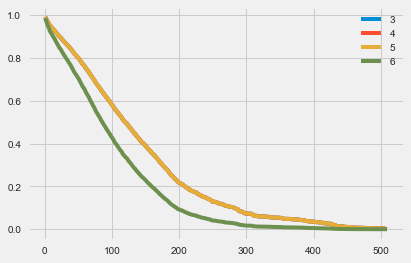

In [296]:
d_data = Survival_data1.iloc[3:7,:]
cph.predict_survival_function(d_data).plot()

----------------------------

 ### Next steps and future Enhancements

As a next steps below are some of the suggections:-
    

- Since i have use Tree based model this approch can be reused for any productsku. Provideed we have the same features for it.

- However since most of the features were categorical , we need to enhance the data. Then this model will be better utilized
    

- In the current approch we need more data like Begining Inventory , Number of store selleing the productsku,Previous purchase history of productsku, what discuount was offered, Product description,digital interaction of the productsku,
- How many times customers added to the cart, how many times they clicked on it and spend time on that particular webpage, customer information like demogarphic and others
    
    
- Alternative approch We can use will be timeseries data for forecasting the numbers of number of days the product was sold at full price and FullPriceUnits using the historical data.


- Once we close on the model, we can build a look alike model to target the new products as well, with ceratin featutes.
